# Loading the Libraries

In [12]:
#Loading libraries
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#from scipy.stats import chi2_contingency
#from random import randrange, uniform



# Setting the working path

In [13]:
os.chdir(r"C:\Users\swat\Desktop\Edwiser\Final_project")
os.getcwd()

'C:\\Users\\swat\\Desktop\\Edwiser\\Final_project'

# Loading the data to dataframe

In [14]:
train_df = pd.read_csv(r".\train_cab\train_cab.csv")
test_df = pd.read_csv(r".\test\test.csv")

df = train_df.append(test_df)

In [15]:
df.head()
#df.to_excel('df.xlsx',sheet_name = "hello")

,dropoff_latitude,dropoff_longitude,fare_amount,passenger_count,pickup_datetime,pickup_latitude,pickup_longitude
0,40.712278,-73.841610,4.5,1.0,2009-06-15 17:26:21 UTC,40.721319,-73.844311
1,40.782004,-73.979268,16.9,1.0,2010-01-05 16:52:16 UTC,40.711303,-74.016048
2,40.750562,-73.991242,5.7,2.0,2011-08-18 00:35:00 UTC,40.761270,-73.982738
3,40.758092,-73.991567,7.7,1.0,2012-04-21 04:30:42 UTC,40.733143,-73.987130
4,40.783762,-73.956655,5.3,1.0,2010-03-09 07:51:00 UTC,40.768008,-73.968095


In [16]:
df.shape

(25981, 7)

#### Summary:
1. We have both input variable and target variable. SO it is a supervised machine learning model.
2. We need to find the fare amount for the cab services which is a continuous variable. So it is a regression problem.
3. For regression problems we need to use regression supervised machine learning algorithms.
    1. KNN
    2. Linear regression
    3. Decision tree
    4. Ensemble methods.
4. For regression problems we should follow regression metrics
    1. RSME (Root mean square error)
    2. MSE (Mean square error)
    3. R square
    4. Adjusted R square.

In [17]:
df['passenger_count'].value_counts()

1.00       18173
2.00        3796
5.00        1741
3.00        1123
4.00         535
6.00         479
0.00          57
53.00          2
43.00          2
554.00         1
0.12           1
531.20         1
456.00         1
354.00         1
55.00          1
557.00         1
5345.00        1
236.00         1
1.30           1
345.00         1
58.00          1
35.00          1
535.00         1
536.00         1
537.00         1
5334.00        1
87.00          1
Name: passenger_count, dtype: int64

#### Summary:
   
   In the passenger count column we have many outliers and null values. As per the above results, We can consider maximum no of persons can sit a cab is 6 persons. So other than passenger count (1,2,3,4,5,6) remaining values we should clean.

In [18]:
Categorical =[]
Numerical =[]
float_data = []

for col in df.columns.values:
    if df[col].dtypes=='object':
        Categorical.append(col)
    elif df[col].dtypes=='int64':
        Numerical.append(col)
    else:
        float_data.append(col)
        
print('Categorical : ',Categorical)
print("="*100)
print("Numerical : ", Numerical)
print("="*100)
print("float_data : ", float_data)
print("="*100)
print(df.dtypes)

Categorical :  ['fare_amount', 'pickup_datetime']
Numerical :  []
float_data :  ['dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'pickup_latitude', 'pickup_longitude']
dropoff_latitude     float64
dropoff_longitude    float64
fare_amount           object
passenger_count      float64
pickup_datetime       object
pickup_latitude      float64
pickup_longitude     float64
dtype: object


#### Summary:
1. We have lot of columns as numeric or float. So we don't have categorical variables in the data.
2. Preprocessing techniques varies ffor both numerical and categorical data.

In [19]:
# when we tried convert pickup_datetime variable to date format it was throwing error coz of a starnge value in the variable
# So first treat it as NA and drop 
df.loc[df['pickup_datetime'] == '43' ,'pickup_datetime'] = np.nan  

df = df.drop(df[df['pickup_datetime'].isnull()].index, axis = 0)

# Now lets convert pickup_datetime
df['pickup_datetime'] =  pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

df['Year'] = df['pickup_datetime'].dt.year
df['Month'] = df['pickup_datetime'].dt.month
df['Date'] = df['pickup_datetime'].dt.day
df['Day'] = df['pickup_datetime'].dt.dayofweek
df['Hour'] = df['pickup_datetime'].dt.hour
df['Minute'] = df['pickup_datetime'].dt.minute

df = df.drop('pickup_datetime',axis=1)

In [20]:
df.head()

,dropoff_latitude,dropoff_longitude,fare_amount,passenger_count,pickup_latitude,pickup_longitude,Year,Month,Date,Day,Hour,Minute
0,40.712278,-73.841610,4.5,1.0,40.721319,-73.844311,2009,6,15,0,17,26
1,40.782004,-73.979268,16.9,1.0,40.711303,-74.016048,2010,1,5,1,16,52
2,40.750562,-73.991242,5.7,2.0,40.761270,-73.982738,2011,8,18,3,0,35
3,40.758092,-73.991567,7.7,1.0,40.733143,-73.987130,2012,4,21,5,4,30
4,40.783762,-73.956655,5.3,1.0,40.768008,-73.968095,2010,3,9,1,7,51


In [21]:
df.dtypes

dropoff_latitude     float64
dropoff_longitude    float64
fare_amount           object
passenger_count      float64
pickup_latitude      float64
pickup_longitude     float64
Year                   int64
Month                  int64
Date                   int64
Day                    int64
Hour                   int64
Minute                 int64
dtype: object

#### Summary:
1. We have a date object in the dataframe, We cannot perform with the data object for training the machine learning model. So either we need to drop the variable or we need to perform feature engineering for that column by cconverting the date in to separate columns like year, month, date,time etc..

# Statistics

In [22]:
df.mean()


dropoff_latitude       40.223677
dropoff_longitude     -73.038957
passenger_count         2.260439
pickup_latitude        40.233812
pickup_longitude      -73.039649
Year                 2011.763193
Month                   6.488433
Date                   15.869510
Day                     2.964125
Hour                   13.486200
Minute                 29.603680
dtype: float64

In [23]:
df.median()


dropoff_latitude       40.753738
dropoff_longitude     -73.980118
passenger_count         1.000000
pickup_latitude        40.752786
pickup_longitude      -73.981985
Year                 2012.000000
Month                   6.000000
Date                   16.000000
Day                     3.000000
Hour                   14.000000
Minute                 31.000000
dtype: float64

In [24]:
df.std() #Standard deviation


dropoff_latitude      4.883305
dropoff_longitude     8.348750
passenger_count      47.826103
pickup_latitude       5.383911
pickup_longitude      8.351386
Year                  1.841673
Month                 3.424242
Date                  8.746222
Day                   1.980548
Hour                  6.655178
Minute               17.833486
dtype: float64

In [25]:
df.skew()


dropoff_latitude     -10.691715
dropoff_longitude      8.916297
passenger_count      107.634524
pickup_latitude        3.573762
pickup_longitude       8.915518
Year                   0.093140
Month                  0.015603
Date                  -0.043127
Day                    0.025323
Hour                  -0.419189
Minute                -0.068490
dtype: float64

In [26]:
df.describe()

,dropoff_latitude,dropoff_longitude,passenger_count,pickup_latitude,pickup_longitude,Year,Month,Date,Day,Hour,Minute
count,25979.000000,25979.000000,25924.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000
mean,40.223677,-73.038957,2.260439,40.233812,-73.039649,2011.763193,6.488433,15.869510,2.964125,13.486200,29.603680
std,4.883305,8.348750,47.826103,5.383911,8.351386,1.841673,3.424242,8.746222,1.980548,6.655178,17.833486
min,-74.006377,-74.429332,0.000000,-74.006893,-74.438233,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,40.734948,-73.991211,1.000000,40.735395,-73.992300,2010.000000,4.000000,8.000000,1.000000,9.000000,14.000000
50%,40.753738,-73.980118,1.000000,40.752786,-73.981985,2012.000000,6.000000,16.000000,3.000000,14.000000,31.000000
75%,40.768338,-73.963775,2.000000,40.767279,-73.967270,2013.000000,9.000000,24.000000,5.000000,19.000000,45.000000
max,41.696683,40.802437,5345.000000,401.083332,40.766125,2015.000000,12.000000,31.000000,6.000000,23.000000,59.000000


In [27]:
df.corr(method ='pearson')

,dropoff_latitude,dropoff_longitude,passenger_count,pickup_latitude,pickup_longitude,Year,Month,Date,Day,Hour,Minute
dropoff_latitude,1.000000,-0.978197,-0.000508,0.883000,-0.952288,0.008589,0.012631,0.001126,-0.005476,0.008140,-0.002324
dropoff_longitude,-0.978197,1.000000,0.000511,-0.864221,0.964045,-0.011468,-0.012506,-0.003367,0.005624,-0.007193,0.002578
passenger_count,-0.000508,0.000511,1.000000,-0.000491,0.000500,0.001650,-0.009724,0.006889,-0.002741,0.002000,-0.002480
pickup_latitude,0.883000,-0.864221,-0.000491,1.000000,-0.894925,0.007045,0.010874,0.003931,-0.001717,0.007126,-0.003355
pickup_longitude,-0.952288,0.964045,0.000500,-0.894925,1.000000,-0.012043,-0.011119,-0.001893,0.004624,-0.007452,0.000580
Year,0.008589,-0.011468,0.001650,0.007045,-0.012043,1.000000,-0.146754,0.026857,0.008383,0.001797,-0.009028
Month,0.012631,-0.012506,-0.009724,0.010874,-0.011119,-0.146754,1.000000,-0.036819,-0.075229,0.058736,-0.024079
Date,0.001126,-0.003367,0.006889,0.003931,-0.001893,0.026857,-0.036819,1.000000,-0.020770,0.018045,0.032459
Day,-0.005476,0.005624,-0.002741,-0.001717,0.004624,0.008383,-0.075229,-0.020770,1.000000,-0.103083,-0.012798
Hour,0.008140,-0.007193,0.002000,0.007126,-0.007452,0.001797,0.058736,0.018045,-0.103083,1.000000,-0.028335


In [28]:
df.cov()

,dropoff_latitude,dropoff_longitude,passenger_count,pickup_latitude,pickup_longitude,Year,Month,Date,Day,Hour,Minute
dropoff_latitude,23.846669,-39.880602,-0.118684,23.215191,-38.836542,0.077247,0.211210,0.048109,-0.052963,0.264553,-0.202356
dropoff_longitude,-39.880602,69.701630,0.204275,-38.845825,67.216747,-0.176327,-0.357515,-0.245840,0.092996,-0.399686,0.383804
passenger_count,-0.118684,0.204275,2287.336083,-0.126495,0.199816,0.145318,-1.592351,2.881611,-0.259592,0.636739,-2.115660
pickup_latitude,23.215191,-38.845825,-0.126495,28.986497,-40.238597,0.069856,0.200475,0.185117,-0.018304,0.255317,-0.322104
pickup_longitude,-38.836542,67.216747,0.199816,-40.238597,69.745644,-0.185226,-0.317979,-0.138284,0.076485,-0.414176,0.086325
Year,0.077247,-0.176327,0.145318,0.069856,-0.185226,3.391761,-0.925482,0.432605,0.030576,0.022023,-0.296526
Month,0.211210,-0.357515,-1.592351,0.200475,-0.317979,-0.925482,11.725432,-1.102710,-0.510192,1.338540,-1.470440
Date,0.048109,-0.245840,2.881611,0.185117,-0.138284,0.432605,-1.102710,76.496406,-0.359790,1.050359,5.062764
Day,-0.052963,0.092996,-0.259592,-0.018304,0.076485,0.030576,-0.510192,-0.359790,3.922572,-1.358721,-0.452012
Hour,0.264553,-0.399686,0.636739,0.255317,-0.414176,0.022023,1.338540,1.050359,-1.358721,44.291393,-3.362964


In [29]:
kurt = df.kurt();
print(kurt);

dropoff_latitude       144.760148
dropoff_longitude       78.817845
passenger_count      11970.220990
pickup_latitude        874.328133
pickup_longitude        78.798656
Year                    -1.140979
Month                   -1.184661
Date                    -1.212147
Day                     -1.252835
Hour                    -0.863835
Minute                  -1.231601
dtype: float64


In [30]:
from scipy.stats import ttest_1samp
import numpy as np

print(df['passenger_count'].head())
passenger_count_mean = np.mean(df['passenger_count'].values)
print(passenger_count_mean)
tset, pval = ttest_1samp(passenger_count_mean, 4)
print('p-values',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

0    1.0
1    1.0
2    2.0
3    1.0
4    1.0
Name: passenger_count, dtype: float64
nan
p-values nan
we are accepting null hypothesis


### Summary
1. We need to perform many statastical techniques like mean, median, mode, skew etcc.. on data to understand it better.

# Missing Value Analysis

In [31]:
#replace 0 with NA in the variables and convert the data wherever required for further operations

df['fare_amount']= df['fare_amount'].apply(pd.to_numeric, errors='coerce')
df['fare_amount']= df['fare_amount'].replace({0:np.nan})
df['passenger_count']=df['passenger_count'].fillna(0)
df['passenger_count']= df['passenger_count'].astype(int)
df['passenger_count']=df['passenger_count'].replace({0: np.nan})
df['pickup_longitude']= df['pickup_longitude'].replace({0:np.nan})
df['pickup_latitude']= df['pickup_latitude'].replace({0:np.nan})
df['dropoff_longitude']= df['dropoff_longitude'].replace({0:np.nan})
df['dropoff_latitude']= df['dropoff_latitude'].replace({0:np.nan})

In [32]:
#Eliminate rows where the pickup and drop location points are same
df[['pickup_longitude','dropoff_longitude']].drop_duplicates(keep=False,inplace=True)
df[['pickup_latitude','dropoff_latitude']].drop_duplicates(keep=False,inplace=True) 
#df[['pickup_longitude','dropoff_longitude']]

In [33]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(df.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(df))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

print(missing_val)
#save output results 
#missing_val.to_csv("Miising_perc.csv", inex = False)

            Variables  Missing_percentage
0         fare_amount           38.257824
1     pickup_latitude            1.212518
2    pickup_longitude            1.212518
3   dropoff_longitude            1.208669
4    dropoff_latitude            1.200970
5     passenger_count            0.434967
6                Year            0.000000
7               Month            0.000000
8                Date            0.000000
9                 Day            0.000000
10               Hour            0.000000
11             Minute            0.000000


In [34]:
df = df.dropna(subset=['pickup_longitude', 'pickup_latitude',
                       'dropoff_longitude','dropoff_latitude','passenger_count'],axis = 0)

In [35]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(df.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(df))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

print(missing_val)
#save output results 
#missing_val.to_csv("Miising_perc.csv", inex = False)

            Variables  Missing_percentage
0         fare_amount           38.904549
1    dropoff_latitude            0.000000
2   dropoff_longitude            0.000000
3     passenger_count            0.000000
4     pickup_latitude            0.000000
5    pickup_longitude            0.000000
6                Year            0.000000
7               Month            0.000000
8                Date            0.000000
9                 Day            0.000000
10               Hour            0.000000
11             Minute            0.000000


# Missing Value Imputation

Framework

 1. Create a small subset of data with complete observations
 2. Delete some values manually
 3. Use multiple methods to fill
 4. See where they are failing
 5. Choose the best method

In [36]:
#Create missing value, a small test to identify which method is good for imputation

x = df["fare_amount"].loc[10055]
print("Actual value : ",x)

Actual value :  27.5


In [37]:
df["fare_amount"].loc[10055] = np.nan

In [38]:
#Mean Imputation
df["fare_amount"] = df["fare_amount"].fillna(df["fare_amount"].mean())

print("Mean Imputation : ",df["fare_amount"].loc[10055])

df["fare_amount"].loc[10055] = x

Mean Imputation :  15.120249935913721


In [39]:
#Median Imputation
df["fare_amount"] = df["fare_amount"].fillna(df["fare_amount"].median())

print("Median Imputation : ",df["fare_amount"].loc[10055])

df["fare_amount"].loc[25] = x

Median Imputation :  27.5


In [40]:
#KNN imputation - Got some error while installing the "pip install fancyimpute".
#df = pd.DataFrame(KNN(k = 1).fit_transform(df), columns = df.columns)
#print("KNN imputation : ",df["fare_amount"].loc[10055])
#df["fare_amount"].loc[25] = x

In [41]:
#As it is found median is very close to original method we will proceed with imputation via mean
df['fare_amount'] = df['fare_amount'].fillna(df['fare_amount'].median())

In [42]:
#Imputing the NAs in target variables may hamper the model, so it is preferred to remove NA rows of the data
df=df.dropna()

In [43]:
#conert into proper data type
convert_datatype={'fare_amount' : 'float','passenger_count': 'int'}
df=df.astype(convert_datatype)

In [44]:
df.shape

(25542, 12)

In [45]:
print("Data types :\n",df.dtypes)
print("="*100)
print("Missing values count :\n",df.isnull().sum())

Data types :
 dropoff_latitude     float64
dropoff_longitude    float64
fare_amount          float64
passenger_count        int32
pickup_latitude      float64
pickup_longitude     float64
Year                   int64
Month                  int64
Date                   int64
Day                    int64
Hour                   int64
Minute                 int64
dtype: object
Missing values count :
 dropoff_latitude     0
dropoff_longitude    0
fare_amount          0
passenger_count      0
pickup_latitude      0
pickup_longitude     0
Year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64


In [46]:
df['passenger_count'].value_counts()

1       17933
2        3760
5        1721
3        1110
4         527
6         473
43          2
536         1
537         1
554         1
354         1
58          1
35          1
531         1
5345        1
5334        1
456         1
345         1
53          1
55          1
87          1
535         1
557         1
Name: passenger_count, dtype: int64

# Outlier Analysis

In [47]:
#save the data with in another place with different name

train_df = df.copy()


In [48]:
train_df = train_df.drop(train_df[train_df["passenger_count"]> 6 ].index, axis=0)
train_df = train_df.drop(train_df[train_df["fare_amount"] < 0 ].index, axis=0)

In [49]:
train_df['passenger_count'].value_counts()

1    17917
2     3760
5     1721
3     1105
4      525
6      473
Name: passenger_count, dtype: int64

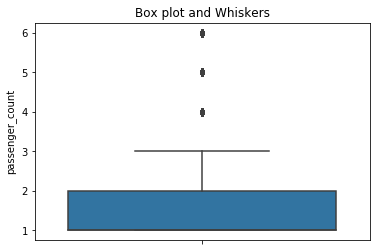

In [79]:
sns.boxplot(y='passenger_count', data=train_df)
plt.title('Box plot and Whiskers')
plt.show()

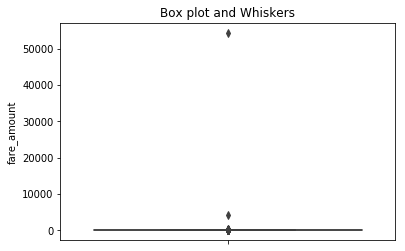

In [80]:
sns.boxplot(y='fare_amount', data=train_df)
plt.title('Box plot and Whiskers')
plt.show()

In [50]:
train_df.columns

Index(['dropoff_latitude', 'dropoff_longitude', 'fare_amount',
       'passenger_count', 'pickup_latitude', 'pickup_longitude', 'Year',
       'Month', 'Date', 'Day', 'Hour', 'Minute'],
      dtype='object')

In [51]:
print("Data types :\n",train_df.dtypes)
print("="*100)
print("Missing values count :\n",train_df.isnull().sum())

Data types :
 dropoff_latitude     float64
dropoff_longitude    float64
fare_amount          float64
passenger_count        int32
pickup_latitude      float64
pickup_longitude     float64
Year                   int64
Month                  int64
Date                   int64
Day                    int64
Hour                   int64
Minute                 int64
dtype: object
Missing values count :
 dropoff_latitude     0
dropoff_longitude    0
fare_amount          0
passenger_count      0
pickup_latitude      0
pickup_longitude     0
Year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64


In [52]:
#save numeric data names
col = ['dropoff_latitude', 'dropoff_longitude', 'pickup_latitude', 'pickup_longitude', 'Year',
       'Month', 'Date', 'Day', 'Hour', 'Minute']
for lst in col:
    #Detect and replace with NA
    #Extract quartiles
    q75, q25 = np.percentile(train_df[lst], [75 ,25])

    #Calculate IQR
    iqr = q75 - q25
   
    # #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)

    # #Replace with NA
    train_df.loc[train_df[lst] < minimum,lst] = np.nan
    train_df.loc[train_df[lst] > maximum,lst] = np.nan

    # #Calculate missing value
    missing_val = pd.DataFrame(train_df.isnull().sum())
    


In [53]:
#As Mean is the best method, we impute missing values/ in this case outlier values with mean

train_df['pickup_longitude'] = train_df['pickup_longitude'].fillna(train_df['pickup_longitude'].median())
train_df['pickup_latitude'] = train_df['pickup_latitude'].fillna(train_df['pickup_latitude'].median())
train_df['dropoff_longitude'] = train_df['dropoff_longitude'].fillna(train_df['dropoff_longitude'].median())
train_df['dropoff_latitude'] = train_df['dropoff_latitude'].fillna(train_df['dropoff_latitude'].median())

#imputed with mode for categorical variables
#train_df['passenger_count'] = train_df['passenger_count'].fillna(int(train_df['passenger_count'].mode()))

In [54]:
#convert the data type of categorical variable passenger count
#train_df['passenger_count']=train_df['passenger_count'].astype('int')
#train_df['passenger_count']=train_df['passenger_count'].astype('category')

In [55]:
print("Data types :\n",train_df.dtypes)
print("="*100)
print("Missing values count :\n",train_df.isnull().sum())

Data types :
 dropoff_latitude     float64
dropoff_longitude    float64
fare_amount          float64
passenger_count        int32
pickup_latitude      float64
pickup_longitude     float64
Year                 float64
Month                float64
Date                 float64
Day                  float64
Hour                 float64
Minute               float64
dtype: object
Missing values count :
 dropoff_latitude     0
dropoff_longitude    0
fare_amount          0
passenger_count      0
pickup_latitude      0
pickup_longitude     0
Year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64


In [56]:
print("Data types :\n",train_df.dtypes)

Data types :
 dropoff_latitude     float64
dropoff_longitude    float64
fare_amount          float64
passenger_count        int32
pickup_latitude      float64
pickup_longitude     float64
Year                 float64
Month                float64
Date                 float64
Day                  float64
Hour                 float64
Minute               float64
dtype: object


In [57]:
#conert into proper data type
intg = ["Year","Month","Date","Day","Hour","Minute"]

for i in intg:
    train_df[i] = train_df[i].astype(int)

In [58]:
train_df.head()

,dropoff_latitude,dropoff_longitude,fare_amount,passenger_count,pickup_latitude,pickup_longitude,Year,Month,Date,Day,Hour,Minute
0,40.712278,-73.981399,4.5,1,40.721319,-73.982876,2009,6,15,0,17,26
1,40.782004,-73.979268,16.9,1,40.711303,-74.016048,2010,1,5,1,16,52
2,40.750562,-73.991242,5.7,2,40.761270,-73.982738,2011,8,18,3,0,35
3,40.758092,-73.991567,7.7,1,40.733143,-73.987130,2012,4,21,5,4,30
4,40.783762,-73.956655,5.3,1,40.768008,-73.968095,2010,3,9,1,7,51


# Feature Selection

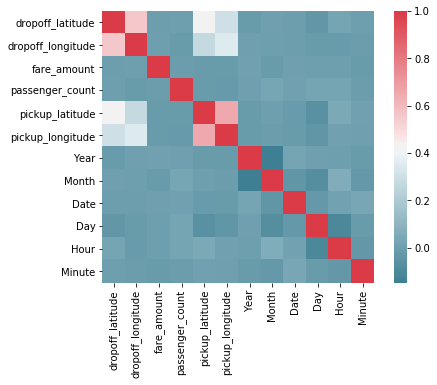

In [59]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

corr = train_df.corr(method ='pearson')
#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

## Feature Scaling

1    17917
2     3760
5     1721
3     1105
4      525
6      473
Name: passenger_count, dtype: int64


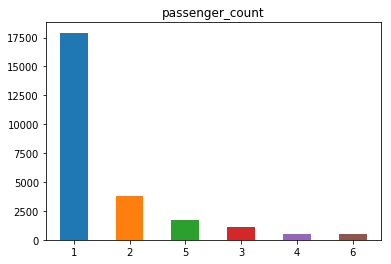

In [60]:
count = train_df['passenger_count'].value_counts()
print(count)
count.plot(kind='bar', title='passenger_count', rot = 'horizontal');

In [61]:
cnames = ['dropoff_latitude', 'dropoff_longitude',
          'pickup_latitude', 'pickup_longitude', 'Year','Month', 'Date', 'Day', 'Hour', 'Minute']

In [62]:
#Nomalisation
for i in cnames:
    print(i)
    train_df[i] = (train_df[i] - min(train_df[i]))/(max(train_df[i]) - min(train_df[i]))

dropoff_latitude
dropoff_longitude
pickup_latitude
pickup_longitude
Year
Month
Date
Day
Hour
Minute


In [63]:
print("Data types :\n",train_df.dtypes)
print("="*100)
print("Missing values count :\n",train_df.isnull().sum())

Data types :
 dropoff_latitude     float64
dropoff_longitude    float64
fare_amount          float64
passenger_count        int32
pickup_latitude      float64
pickup_longitude     float64
Year                 float64
Month                float64
Date                 float64
Day                  float64
Hour                 float64
Minute               float64
dtype: object
Missing values count :
 dropoff_latitude     0
dropoff_longitude    0
fare_amount          0
passenger_count      0
pickup_latitude      0
pickup_longitude     0
Year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64


# Splitting data into Train and test: Random Sampling

In [64]:
df_final = train_df.copy()
Y = df_final['fare_amount'].values
df_final.drop('fare_amount', axis=1, inplace=True)
X = df_final

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# Splitting train & test data.

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# this is Stratified splitting
print('Train shape:',X_train.shape, y_train.shape)
print('Test Shape:',X_test.shape, y_test.shape)
print("="*100)

Train shape: (17085, 11) (17085,)
Test Shape: (8416, 11) (8416,)


# Model Development

In [65]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [66]:
X_train = X_train
y_train = y_train
X_test = X_test
y_test = y_test

In [67]:
def model_and_metrics(X_train, y_train, X_test, y_test, model):

    """ Common function for Model BuildUP & metrics """
    
    print("===================Building the model... ===========================")
    model = model
    #Train the algorithm
    model.fit(X_train, y_train)
    # predict the response
    y_pred = model.predict(X_test)
    print("Model {} ran successfully..".format(model))
    print('\n')

    print("======================== Score's ===================================")
    print('r square : ', metrics.r2_score(y_test, y_pred))
    print('Adjusted r square : {}'.format(1 - (1-metrics.r2_score(y_test, y_pred))*
                                          (len(y_test)-1)/(len(y_test)-X_train.shape[1]-1)))
    print('MAPE : {}'.format(np.mean(np.abs((y_test - y_pred) / y_test))*100))
    print('MSE :', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# LinearRegression

In [68]:
model = LinearRegression()
model_and_metrics(X_train, y_train, X_test, y_test, model)

===================Building the model... ===========================
Model LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) ran successfully..


======================== Score's ===================================
r square :  -0.062267888135728144
Adjusted r square : -0.06365829113067023
MAPE : 115.3805765311416
MSE : 2478.8495793492157
RMSE : 49.788046550846076


# Ridge

In [69]:
model = Ridge()
model_and_metrics(X_train, y_train, X_test, y_test, model)

===================Building the model... ===========================
Model Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) ran successfully..


======================== Score's ===================================
r square :  -0.06212661249933005
Adjusted r square : -0.06351683057851765
MAPE : 115.30725541539431
MSE : 2478.519906339451
RMSE : 49.78473567610308


# Lasso

In [70]:
model = Lasso()
model_and_metrics(X_train, y_train, X_test, y_test, model)

===================Building the model... ===========================
Model Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False) ran successfully..


======================== Score's ===================================
r square :  -0.006552050987458813
Adjusted r square : -0.007869527493986839
MAPE : 77.13450954847055
MSE : 2348.8341839667373
RMSE : 48.46477260822274


# KNeighborsRegressor

In [71]:
model = KNeighborsRegressor()
model_and_metrics(X_train, y_train, X_test, y_test, model)

===================Building the model... ===========================
Model KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform') ran successfully..


======================== Score's ===================================
r square :  -12.030828994841643
Adjusted r square : -12.047885053735415
MAPE : 73.08036373193538
MSE : 30408.02168003364
RMSE : 174.3789599694689


# DecisionTreeRegressor

In [72]:
model = DecisionTreeRegressor()
model_and_metrics(X_train, y_train, X_test, y_test, model)

===================Building the model... ===========================
Model DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') ran successfully..


======================== Score's ===================================
r square :  -0.0039719835525673375
Adjusted r square : -0.005286083007479014
MAPE : 46.10894931125789
MSE : 2342.813481329385
RMSE : 48.40261853794054


# RandomForestRegressor

In [73]:
model = RandomForestRegressor()
model_and_metrics(X_train, y_train, X_test, y_test, model)

===================Building the model... ===========================
Model RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False) ran successfully..


======================== Score's ===================================
r square :  -63.07262243423352
Adjusted r square : -63.15648712328357
MAPE : 96.97657055248358
MSE : 149516.32723045026
RMSE : 386.67341158974233


# XGBRegressor

In [74]:
model = XGBRegressor()
model_and_metrics(X_train, y_train, X_test, y_test, model)

===================Building the model... ===========================
[11:29:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1) ran successfully..


======================== Score's ===================================
r square :  -1.661918479403801
Adjusted r square : -1.6654026658951673
MAPE : 66.80702936695616
MSE : 6211.705706846061
RMSE : 78.81437500130329


# Chossing the best model:

# DecisionTreeRegressor

In [77]:
model = DecisionTreeRegressor()
model_and_metrics(X_train, y_train, X_test, y_test, model)

===================Building the model... ===========================
Model DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') ran successfully..


======================== Score's ===================================
r square :  -0.0030836681109716046
Adjusted r square : -0.004396604849336683
MAPE : 46.65976083860093
MSE : 2340.740557556274
RMSE : 48.381200455923725


# Summary:

From all the different models. Decision tree regression gave best results. The RMSE, MAPE, MSE values of decision tree is less than the other models. So we consider the decision tree.

===================Building the model... ===========================

Model DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') ran successfully..


======================== Score's ===================================

r square :  -0.004573787642432547
Adjusted r square : -0.005888674799032545
MAPE : 47.11650414546063
MSE : 2344.217818061837
RMSE : 48.417123190683654

Root mean square error is 48%. The lower the RMSE value the better the model performs.


# Storing the model for the deployment

In [78]:
import pickle

# Save the model as a pickle in a file 
model_file = open('cab_fare_model.pkl', 'ab')
pickle.dump(model, model_file) 
model_file.close()

# # Load the model from the file 
# model_from_pickle = pickle.load('cab_fare_model.pkl')